In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium


#need to run this line in terminal to install the Spanish lemmatization library - >> python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')


df1 = pd.read_csv('Airtables/CBP One 23/Cleaned Privilege Document CBP ONE 2023.csv')

df2 = pd.read_csv("Airtables/LAMX Front Desk Data/LAMX Front Desk (Combined) data.csv")

df3 = pd.read_csv('Airtables/T42_Exceptions Post Consortium/CleanedT42File.csv')

df4 = pd.read_csv('Airtables/T42_Screenings/T42 Screenings (Combined) data.csv')

df = pd.concat([df1, df2, df3, df4], axis=0)
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,Birth Country
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,06/11/2021,Rosa Maria Sales,Guatemala,8/7/2009,Verified no status in a third country/no US de...,4.0,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN
686,06/11/2021,Liliana Maceda Roque,Mexico,10/12/2001,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Por amenazas tengo mucho miedo q me maten ami ...,NaN
687,06/11/2021,Keylin Minora Zepeda Banegas,Honduras,11/6/1989,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Pues me da miedo salir ala calle me da miedo m...,NaN
688,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Estoy padesiendoede trauma insomnio nervios,NaN,Yo Brenda Yamileth Lara barahona fui secuestra...,NaN


In [2]:
print(df['Total Family Members'].value_counts())

more_than_1 = df[df['Total Family Members'] != 1]['Total Family Members'].count()
total= df['Total Family Members'].count()
print(more_than_1)
print(total)
print(f"{more_than_1/total} of parties that are not singles" )

Total Family Members
1.0     3234
3.0     2219
2.0     2126
4.0     1573
5.0      887
6.0      519
7.0      229
8.0       54
10.0      34
9.0       26
11.0       8
13.0       5
0.0        4
12.0       3
15.0       1
Name: count, dtype: int64
7688
10922
0.7039003845449552 of parties that are not singles


In [3]:
df['Total Family Members'] = df['Total Family Members'].fillna(1)
df['Total Family Members'] = df['Total Family Members'].replace(0,1)

In [4]:
nan_count = df['Total Family Members'].isna().sum()
print(nan_count)

0


In [5]:
print(f"Total Number of people in every party: \033[1m{int(df['Total Family Members'].sum())}\033[0m")
print(f"Average Party Size: \033[1m{df['Total Family Members'].mean()}\033[0m")
#prior to turning every row that didnt have the total family members into a 

Total Number of people in every party: 30802
Average Party Size: 2.8199212670511766


In [6]:
df['LGBTQ+'] = df['LGBTQ+'].replace(False, "No")
df['LGBTQ+'] = df['LGBTQ+'].replace(True, "Si")
df['LGBTQ+'] = df['LGBTQ+'].replace("Prefiero no decir", "Unknown")
df['LGBTQ+'] = df['LGBTQ+'].replace( "Mi niño es ciudadano estadounidense nacio el 14 de abril de 2017 en el hospital Mission  en Alton texas.","Unknown")


df['LGBTQ+'].value_counts()


LGBTQ+
No         7564
Unknown    1171
Si         1157
Name: count, dtype: int64

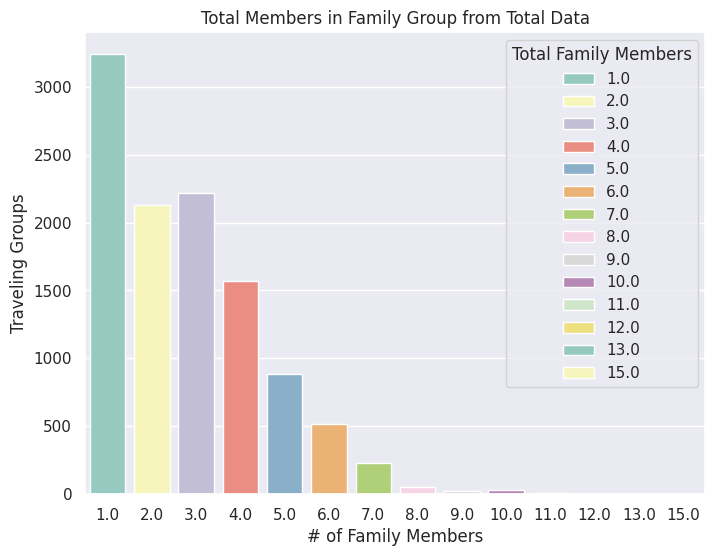

In [7]:
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Total Family Members', data=df, palette="Set3", hue="Total Family Members")

# Customize the plot (optional)
plt.title('Total Members in Family Group from Total Data')
plt.xlabel('# of Family Members')
plt.ylabel('Traveling Groups')

# Show the plot
plt.show()

Country of Origin
Haiti                   3471
Mexico                  1876
Honduras                1707
Guatemala                858
Venezuela                851
El Salvador              431
Cuba                     136
Other                    107
Nicaragua                 95
Colombia                  73
Ecuador                   55
Brazil                     2
Republica Dominicana       1
Cameroon                   1
Name: count, dtype: int64


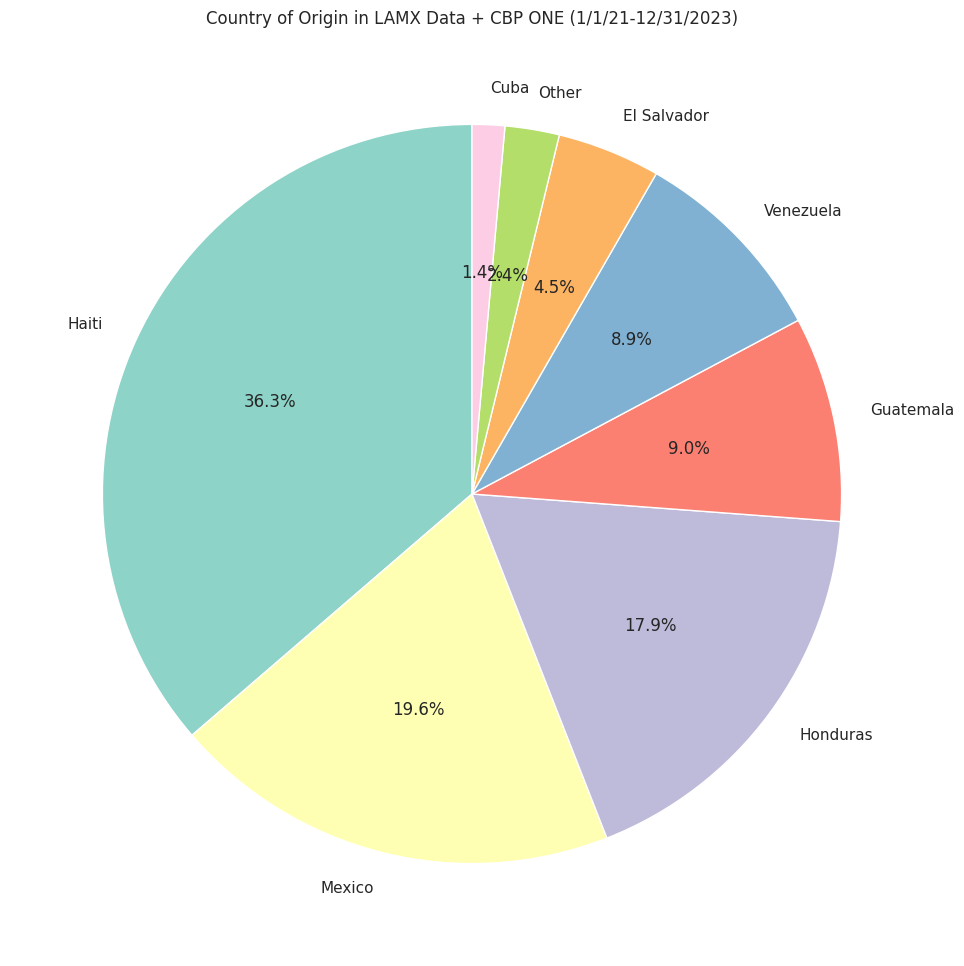

In [8]:
country_mapping = {
    'México': 'Mexico',
    'Venezula': 'Venezuela',
    'Nicaragua': 'Nicaragua',
    'venezuela' : 'Venezuela',
    'Otro': 'Other',
    "mexico": "Mexico",
    "Mujer" : "Other",
    "Hombre" : "Other"
}



df["Country of Origin"] = df["Country of Origin"].replace(country_mapping).str.strip()

category_counts = df['Country of Origin'].value_counts()
print(category_counts)
lowest_categories = category_counts.nsmallest(6).index.tolist()

# Combine them into "Other"
category_counts['Other'] = category_counts[lowest_categories].sum()
category_counts = category_counts.drop(lowest_categories)
category_counts = category_counts.sort_values(ascending=False)


# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Country of Origin in LAMX Data + CBP ONE (1/1/21-12/31/2023)')

# Show the plot
plt.show()


In [9]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

value_counts = df['Country of Origin'].value_counts()

value_counts_df = pd.DataFrame(value_counts).reset_index()

# Rename columns
value_counts_df.columns = ['Country', 'Count']

central_america_coords = [14.69, -90.53]

# Create a map centered around Central America
m = folium.Map(location=central_america_coords, zoom_start=4)

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Immigration Country',
    data=value_counts_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    nan_fill_color='white',
    legend_name="Person per Country",

).add_to(m)

m


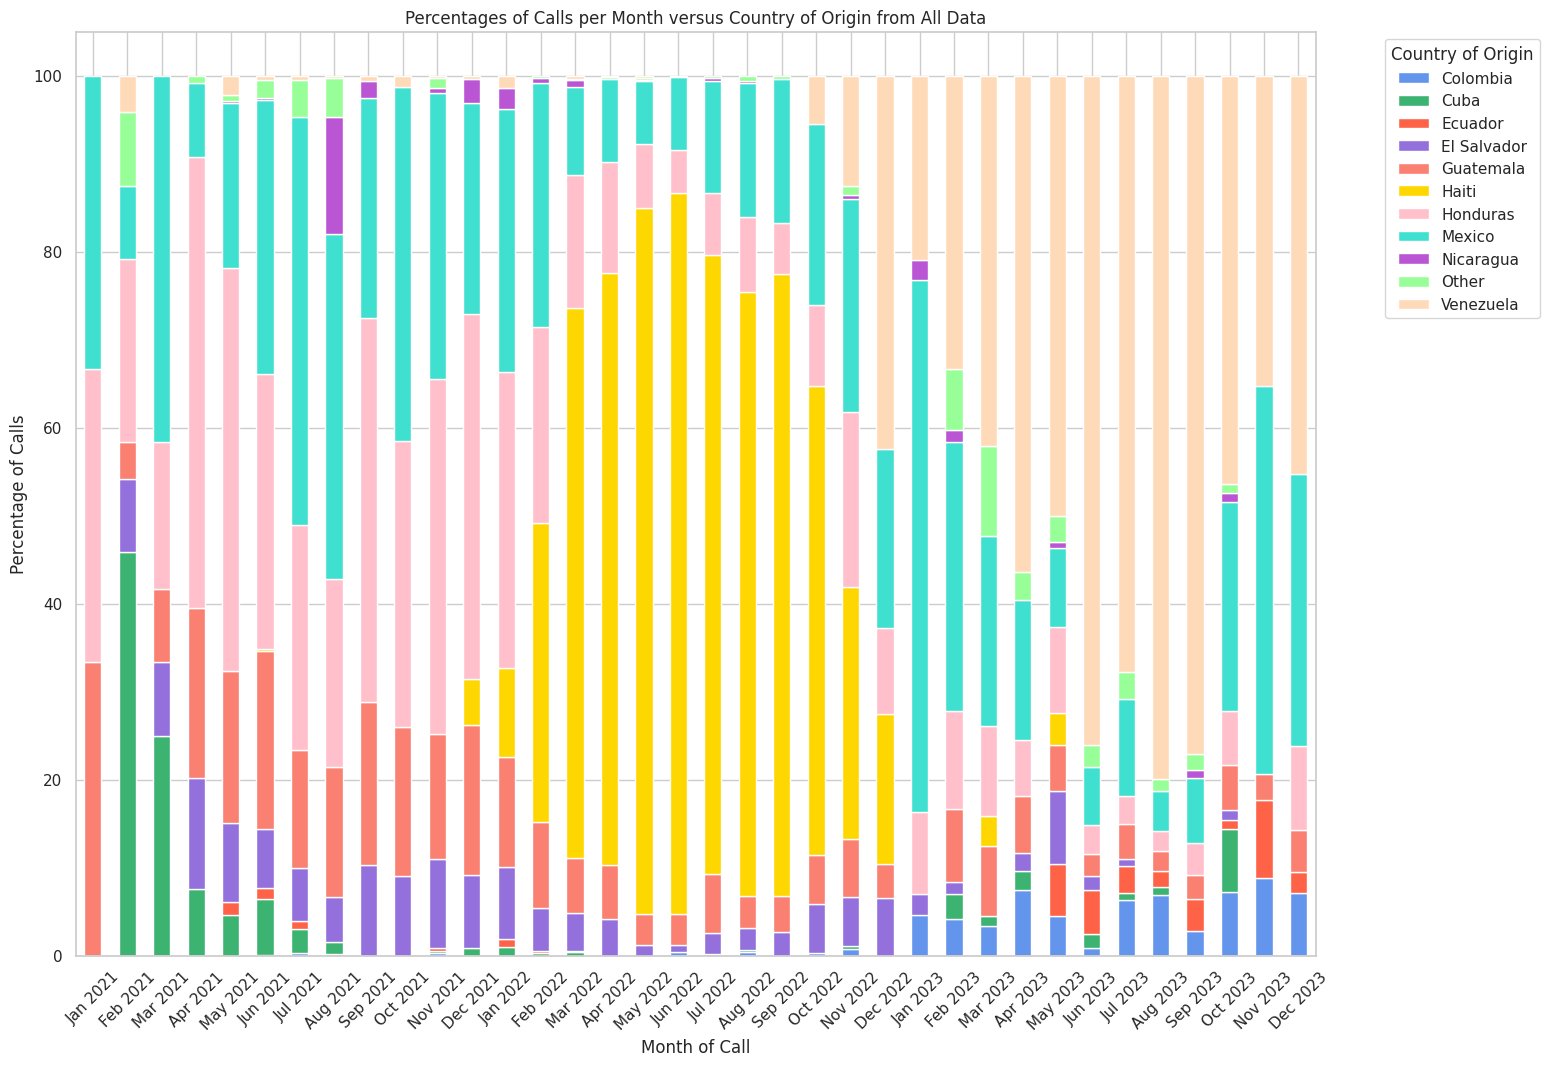

In [10]:
import calendar
import matplotlib as mpl
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
def replace_dates_before(date):
    start_date = datetime.strptime("2021-1-01", '%Y-%m-%d')
    if date < start_date:
        return start_date
    else:
        return date


df['Date'] = df['Date'].apply(replace_dates_before)
# Step 3: Extract month from 'Date of Appt' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

value_counts = df['Country of Origin'].value_counts()

# Get values occurring less than 5 times
values_to_replace = value_counts[value_counts < 5].index.tolist()

# Replace values with 'Other'
df['Country of Origin'] = df['Country of Origin'].replace(values_to_replace, 'Other')


# Step 4: Group data by month and country of origin
grouped = df.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
'''cmap = plt.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=len(percentages) - 1)
colors = [cmap(norm(i)) for i in range(len(percentages))]
'''

# Step 6: Plot the bar graph
ax = percentages.plot(kind='bar', stacked=True,figsize=(16, 12), color=['#6495ED', '#3CB371','#FF6347', '#9370DB', '#FA8072', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
plt.xlabel('Month of Call')
plt.ylabel('Percentage of Calls')
plt.title('Percentages of Calls per Month versus Country of Origin from All Data')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.show()


8493
Country of Origin
Colombia         15
Cuba            118
Ecuador          26
El Salvador     413
Guatemala       810
Haiti          3449
Honduras       1640
Mexico         1696
Nicaragua        90
Other            79
Venezuela       157
dtype: int64
Country of Origin
Colombia         3
Cuba            12
Ecuador          6
El Salvador     68
Guatemala       91
Haiti          230
Honduras       192
Mexico         363
Nicaragua       28
Other           19
Venezuela       30
Name: LGBTQ+, dtype: int64


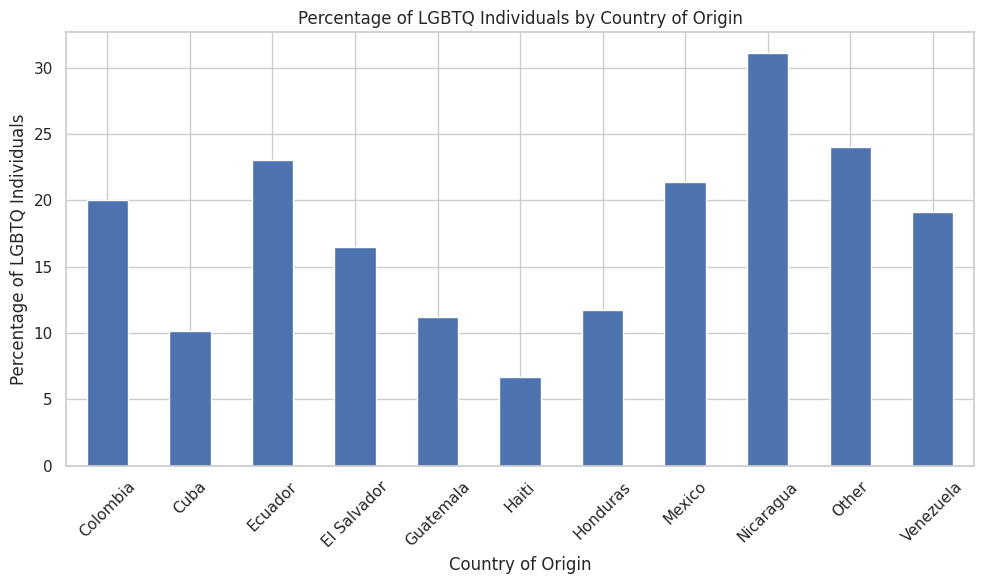

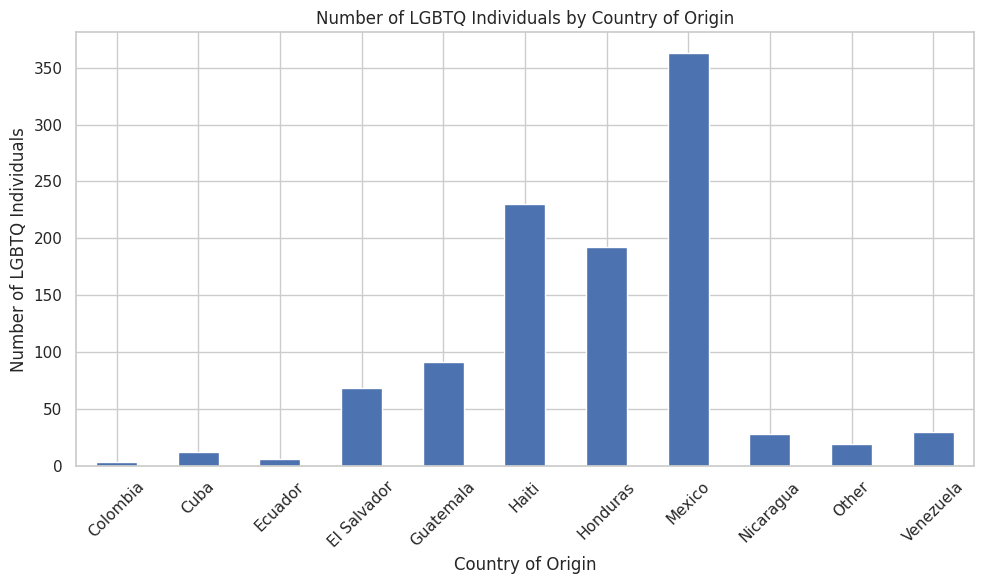

In [11]:
###LGBTQ by Country Graph###
unknowns_removed = df[df["LGBTQ+"] != "Unknown"]
grouped = unknowns_removed.groupby('Country of Origin')

# Step 2: Calculate the total number of individuals from each country
total_individuals = grouped.size()
print(total_individuals.sum())

# Step 3: Calculate the total number of LGBTQ individuals from each country 
lgbtq_individuals = grouped['LGBTQ+'].apply(lambda x: (x == 'Si').sum())
#lgbtq_individuals = grouped['¿Se identifica como miembro de la comunidad LGBTQ+?'].sum()
print(total_individuals)
print(lgbtq_individuals)

# Step 4: Calculate the percentage of LGBTQ individuals for each country
percentages = (lgbtq_individuals / total_individuals) * 100

# Step 5: Plot the percentages on a bar graph
plt.figure(figsize=(10, 6))  # Set the size of the plot
percentages.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage of LGBTQ Individuals')
plt.title('Percentage of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Set the size of the plot
lgbtq_individuals.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of LGBTQ Individuals')
plt.title('Number of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


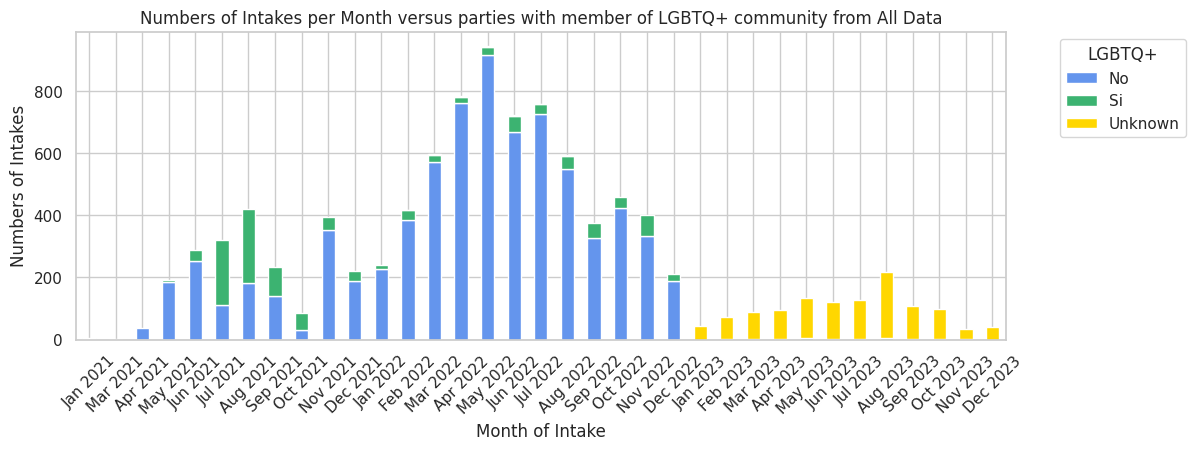

In [12]:
grouped = df.groupby(['Year', 'Month', 'LGBTQ+']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped #grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 6: Plot the bar graph
ax = percentages.plot(kind='bar', stacked=True,figsize=(12, 4), color=['#6495ED', '#3CB371', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
plt.xlabel('Month of Intake')
plt.ylabel('Numbers of Intakes')
plt.title('Numbers of Intakes per Month versus parties with member of LGBTQ+ community from All Data')
plt.legend(title='LGBTQ+', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.show()


In [13]:
replace_violence = {"Si / Yes" : True,
                    "No / No" : False,
                    "No lo sé / I don't know" : None}
df["Victim of Crime/Violence in Mexico"] = df["Victim of Crime/Violence in Mexico"].replace(replace_violence)
df["LGBTQ+"] = df["LGBTQ+"].replace({"Unknown" : None, "No" : False, "Si" : True}) 
grouped = df.groupby([ 'LGBTQ+','Victim of Crime/Violence in Mexico' ]).size().unstack(fill_value=0)
grouped



Victim of Crime/Violence in Mexico,False,True
LGBTQ+,,
False,1905,3953
True,53,893


In [14]:
print(grouped[True][True])
print(grouped[True][False])
print(grouped[False][True])
print(grouped[False][False])

893
3953
53
1905


In [16]:
percentage_of_LGBTQ_suffer_violence = grouped[True][True]/(grouped[False][True] + grouped[True][True])

percentage_of_non_LGBTQ_suffer_violence = grouped[True][False]/(grouped[True][False] + grouped[False][False])

print(f"percentage of violence by non-LGBTQ+ parties - {percentage_of_non_LGBTQ_suffer_violence:.2%}\npercentage of violence by LGBTQ+ parties - {percentage_of_LGBTQ_suffer_violence:.2%}")


percentage of violence by non-LGBTQ+ parties - 67.48%
percentage of violence by LGBTQ+ parties - 94.40%


In [17]:
percentage_of_total_that_suffer_violence = df["Victim of Crime/Violence in Mexico"].sum()/df["Victim of Crime/Violence in Mexico"].count()
print(f"percentage of violence by all parties - {percentage_of_total_that_suffer_violence:.2%}")

percentage of violence by all parties - 71.79%


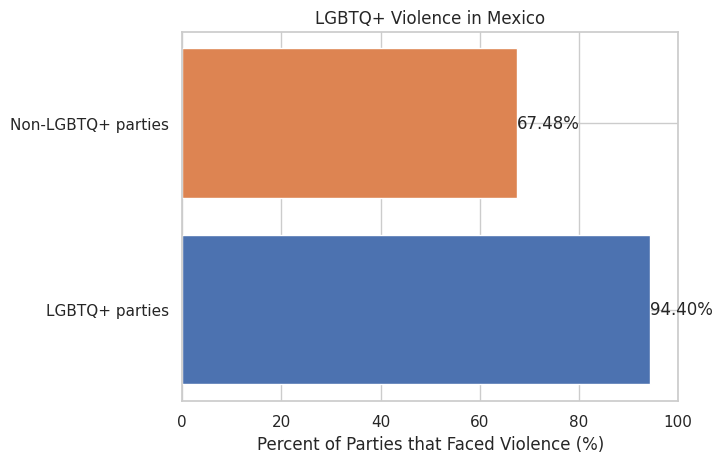

In [18]:
plt.barh("LGBTQ+ parties", percentage_of_LGBTQ_suffer_violence*100)
plt.text(percentage_of_LGBTQ_suffer_violence*100, "LGBTQ+ parties", f"{percentage_of_LGBTQ_suffer_violence:.2%}", va='center', ha='left')

plt.barh("Non-LGBTQ+ parties", percentage_of_non_LGBTQ_suffer_violence*100)
plt.text(percentage_of_non_LGBTQ_suffer_violence*100, "Non-LGBTQ+ parties", f"{percentage_of_non_LGBTQ_suffer_violence:.2%}", va='center', ha='left')


# Adding labels and title
plt.xlabel('Percent of Parties that Faced Violence (%)')
plt.title('LGBTQ+ Violence in Mexico')

plt.xlim(0,  100)  # Adjust multiplier as needed to provide sufficient space


# Show plot
plt.show()


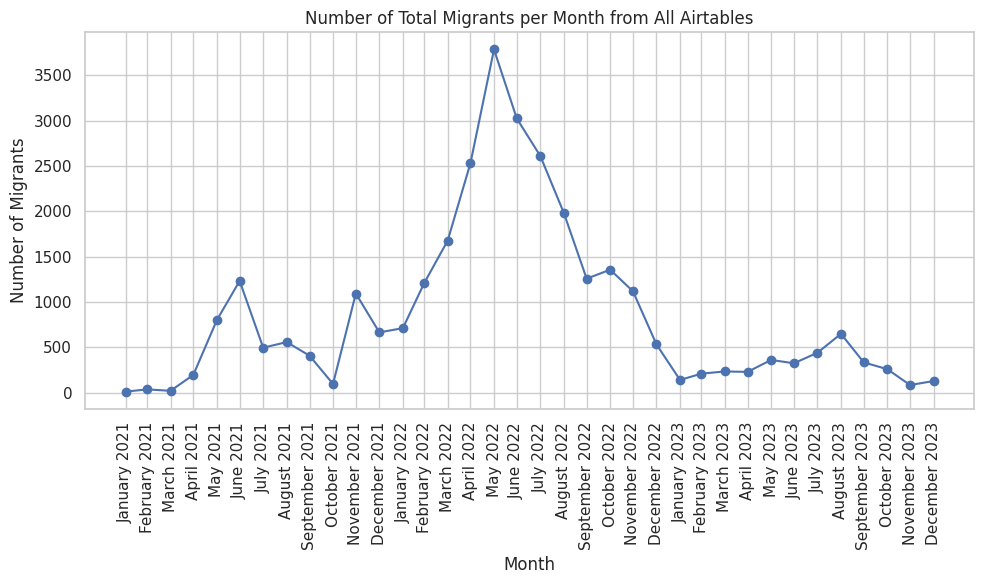

In [19]:
#monthly_counts = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
import numpy as np

# Repeat each row based on the 'value' column
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)

# Resetting index to avoid duplicate index values
df_repeated.reset_index(drop=True, inplace=True)


monthly_counts = df_repeated.groupby(pd.Grouper(key='Date', freq='M')).size()

#monthly_counts = (df['Total Family Members'] * df.groupby(pd.Grouper(key='Date', freq='M')).size()).astype(int)
#monthly_counts = monthly_counts.loc[monthly_counts.index.repeat(monthly_counts['Total Family Members'])]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Number of Total Migrants per Month from All Airtables')
plt.xlabel('Month')
plt.ylabel('Number of Migrants')
plt.xticks(monthly_counts.index, monthly_counts.index.strftime('%B %Y'), rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
monthly_counts.mean()

854.8611111111111

In [21]:
monthly_counts.max()

3787

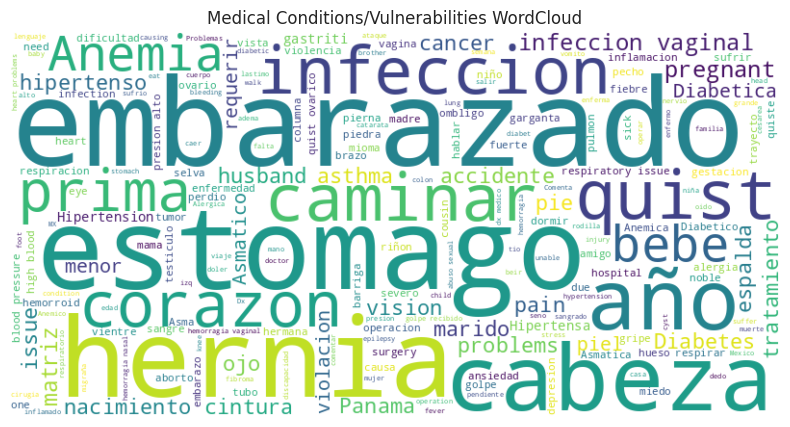

In [22]:
import requests
url = 'https://raw.github.com/stopwords-iso/stopwords-es/master/stopwords-es.txt'
req = requests.get(url)
spanish_stopwords = set(STOPWORDS)
spanish_stopwords.update(req.content.decode("utf-8").split("\n"))
spanish_stopwords.update(["mes", "esposo", "primo","ciudad","calle","hijo","hija", "esposa", "wife", "daughter","son","problema", "problem", "dolor", "padecer", "hermano"])


df_text = df.dropna(subset=['Explain Health Problem'])
text_data = ' '.join(df_text['Explain Health Problem'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
nlp = spacy.load('es_core_news_sm')
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Medical Conditions/Vulnerabilities WordCloud")
plt.show()

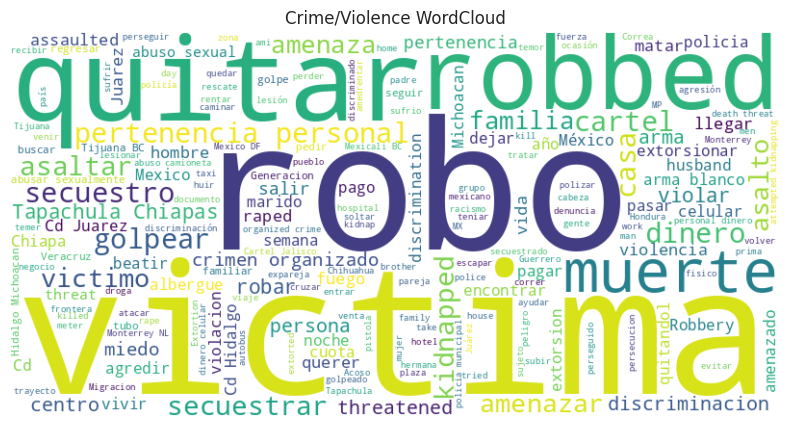

In [23]:
df_text = df.dropna(subset=['Explain Crime/Violence'])
text_data = ' '.join(df_text['Explain Crime/Violence'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Crime/Violence WordCloud")
plt.show()